<a href="https://colab.research.google.com/github/ichrnkv/ds-example/blob/master/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Импорт базовых библиотек и чтение данных

Данные отсюда https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')


Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns

In [0]:
df = pd.read_csv('drive/My Drive/kc_house_data.csv', parse_dates=['date'])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#проверю наличие пропусков и тип данных

df.isnull().mean(), \
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


(id               0.0
 date             0.0
 price            0.0
 bedrooms         0.0
 bathrooms        0.0
 sqft_living      0.0
 sqft_lot         0.0
 floors           0.0
 waterfront       0.0
 view             0.0
 condition        0.0
 grade            0.0
 sqft_above       0.0
 sqft_basement    0.0
 yr_built         0.0
 yr_renovated     0.0
 zipcode          0.0
 lat              0.0
 long             0.0
 sqft_living15    0.0
 sqft_lot15       0.0
 dtype: float64, None)

Нет ни пропущенных данных, ни категориальных признаков. Вероятно, нужно будет нормализовать данные, тк есть признаки типа года постройки-реставрации, почт. индекс и тд.

In [0]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.00,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.110000e+00,7.700000e-01,0.00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184400e+02,290.00,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.00,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


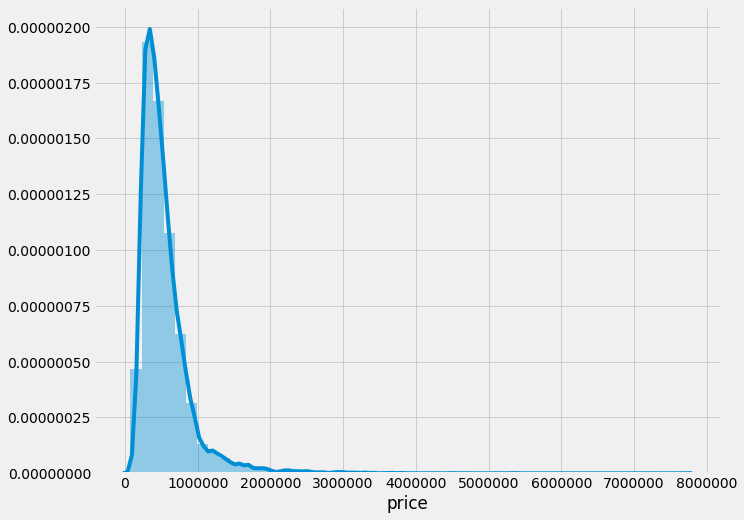

In [0]:
#исследую распределение целевой переменной
plt.figure(figsize = (10,8))
plt.style.use('fivethirtyeight')

sns.distplot(df['price']);

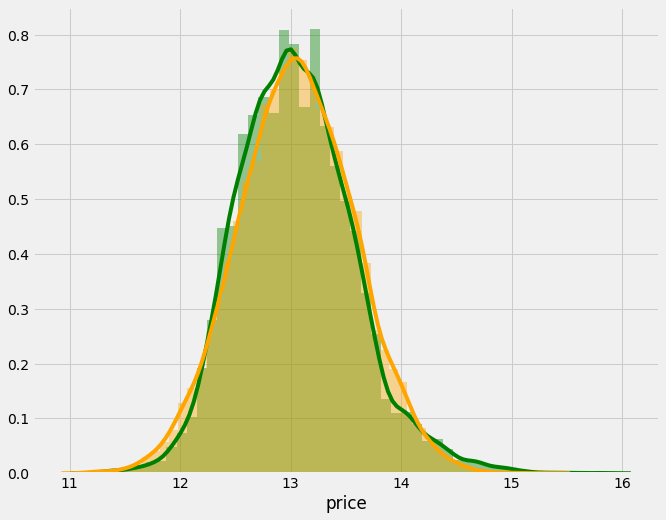

In [0]:
#прологарифмирую целевую переменную
lg = np.log(df['price'])
norm = np.random.normal(np.mean(lg)
                , np.std(lg)
                , size = len(lg))

plt.figure(figsize=(10,8))
sns.distplot(lg, color = 'green')
sns.distplot(norm, color = 'orange');

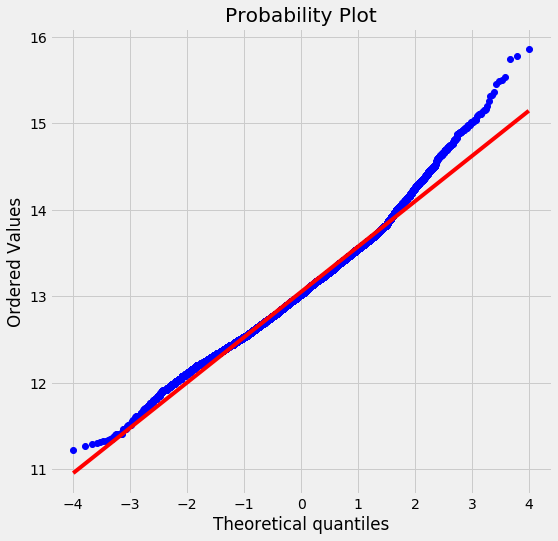

In [0]:
#проверка на нормальность и скошенность
from scipy import stats

fig = plt.figure(figsize=(8, 8))
res = stats.probplot(lg, plot=plt)
plt.show()

In [0]:
stats.shapiro(lg)

(0.9891936779022217, 6.016708805266329e-37)

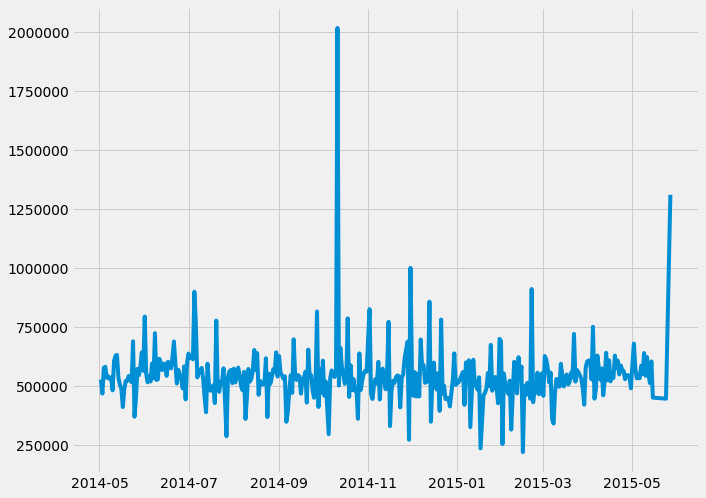

In [0]:
prices = df.groupby(['date'])['price'].mean()

plt.figure(figsize = (10,8))
#plt.style.use('classic')

sns.lineplot(data = prices);

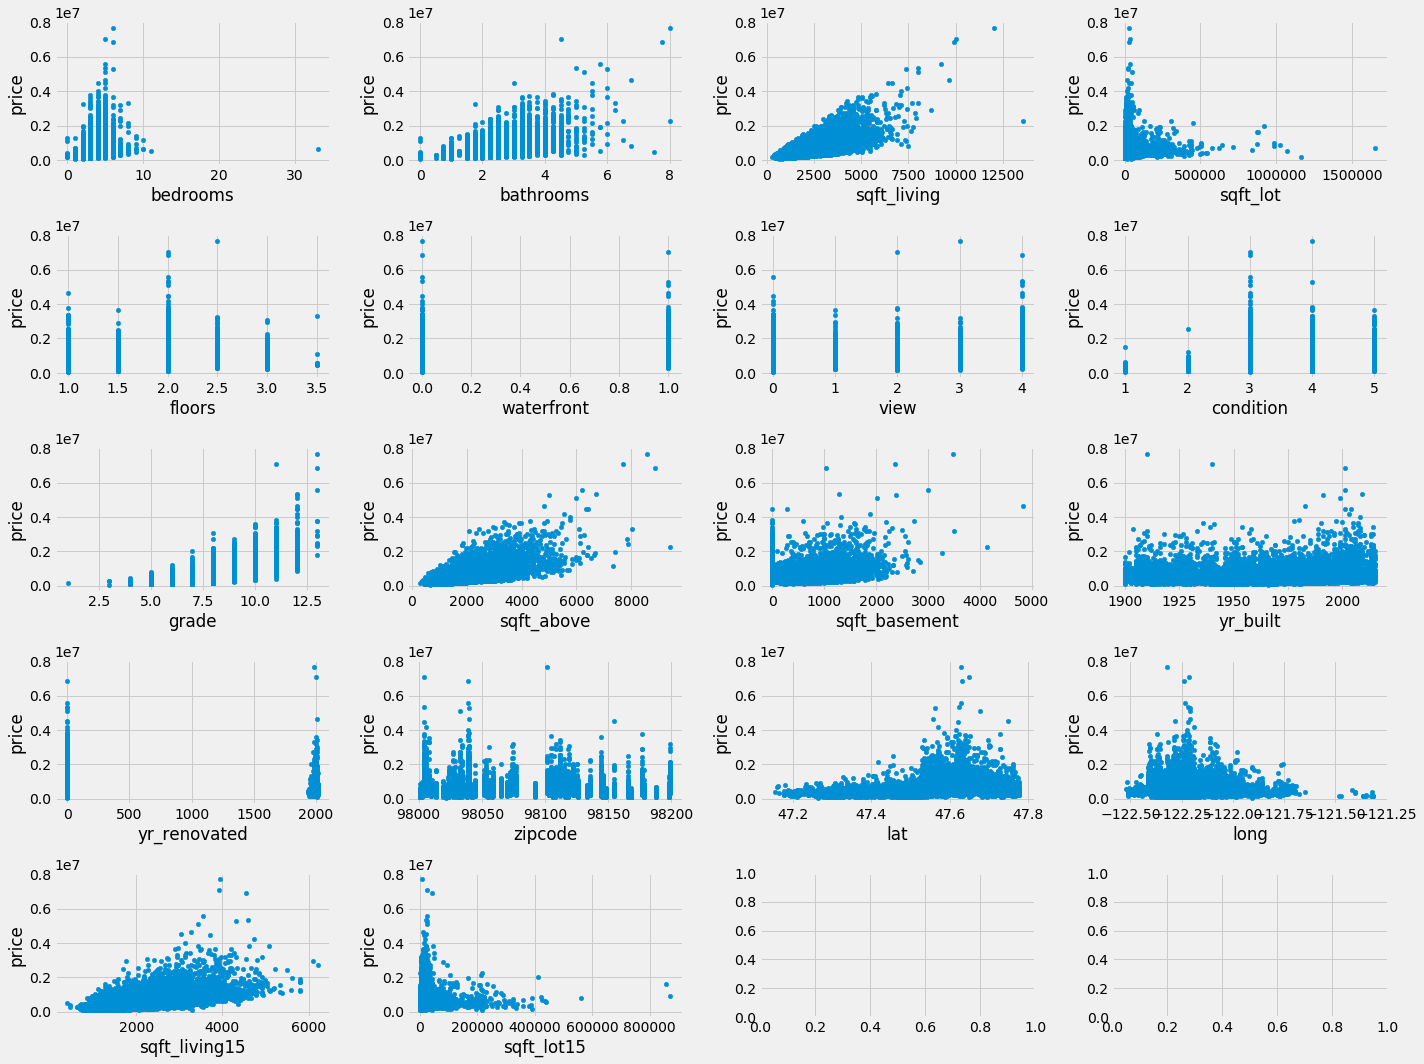

In [0]:
plt.style.use('fivethirtyeight')
cols = list(x for x in df.columns if x not in ['id', 'price', 'date'])


fig, axes = plt.subplots(ncols = 4, nrows = 5, figsize = (20,15))

for i in range(len(cols)):
  df.plot(cols[i], y = 'price', kind = 'scatter', ax = axes[i//4,i%4])
  
  
plt.tight_layout();

In [0]:
df[df['bedrooms']>30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


## 1. Бейзлайн

Тк пропусков и количественных признаков нет, построю сразу бейзлайн.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

X = df.drop(['price', 'id', 'date'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)
print('y_train median is :', y_train.median())
print('y_test median is :', y_test.median())


y_train median is : 450000.0
y_test median is : 451000.0


In [0]:
def rmsle(y_test, y_pred):
    return np.square(np.log(y_pred+1) - np.log(y_test+1)).mean()**0.5

def fit_model(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return round(model.score(X_test, y_test),4), round(rmsle(y_test, pred),4)

  
rf = RandomForestRegressor(random_state=17)
fit_model(rf)

(0.8549, 0.1871)

In [0]:
feature_impotances = pd.DataFrame({'feature': X_train.columns
                                   ,'importance': rf.feature_importances_})

feature_impotances.sort_values(by = 'importance', ascending = False).head(10)

,feature,importance
8,grade,0.311502
2,sqft_living,0.280139
14,lat,0.155199
15,long,0.066366
16,sqft_living15,0.037057
11,yr_built,0.030018
5,waterfront,0.020060
17,sqft_lot15,0.016555
13,zipcode,0.014869
9,sqft_above,0.013630


In [0]:
df[df['price'] == df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10


In [0]:
gb = GradientBoostingRegressor(random_state=17)

fit_model(gb)

(0.8717, 0.1906)

In [0]:
xgb = XGBRegressor(random_state=17, tree_method = 'gpu_hist')
fit_model(xgb)

[18:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.8715, 0.1918)

## Подбор параметров для бустинга

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb_params = {
    'n_estimators': np.arange(10,300),
    'max_depth': np.arange(1,50),
    'learning_rate':np.arange(0.1, 1, .1),
    'min_samples_leaf': np.arange(1, 30)
    }

xgb_rndm = RandomizedSearchCV(xgb, param_distributions = xgb_params, cv = 5
                              , n_iter = 20, verbose = True,
                              random_state = 17, n_jobs = -1)


fit_model(xgb_rndm)

In [20]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

gb_params = {
    'n_estimators': np.arange(200,300),
    'max_depth': np.arange(30,50),
    'learning_rate':np.arange(0.1, 0.5, .1),
    'min_samples_leaf': np.arange(20, 30)
    }

gb_rndm = RandomizedSearchCV(gb, param_distributions = gb_params, cv = 5, n_iter = 20,
                            verbose = True, random_state = 17, n_jobs = 4)


fit_model(gb_rndm)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 17.9min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 40.4min finished


(0.8806, 0.1704)

In [21]:

gb_rndm.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=31,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=27, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=274,
                          n_iter_no_change=None, presort='auto',
                          random_state=17, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
feat =  gb_rndm.best_estimator_.feature_importances_

feat_imp = pd.DataFrame({
                  'feature': X_train.columns,
                  'importance': feat })
feat_imp.sort_values(by='importance', ascending = False).head(10)

,feature,importance
8,grade,0.325921
2,sqft_living,0.254463
14,lat,0.161952
15,long,0.065264
16,sqft_living15,0.031042
5,waterfront,0.028383
11,yr_built,0.024801
9,sqft_above,0.021994
6,view,0.020831
13,zipcode,0.019722
